In [1]:
import numpy as np
from raDec2Pix import raDec2Pix
import matplotlib.pyplot as plt
from astropy.time import Time

Create an raDec2Pix object

In [2]:
rdp = raDec2Pix.raDec2PixClass()

Set up some interesting times, which are the day after the rolls into the Q4, Q5, Q6 and Q7 pointings, and create arrays of once-a-day times for a year and each quarter's 90-day duration.

In [3]:
q4 = Time('2009-12-18 00:00:00.000', format='iso', scale='utc')
q5 = Time('2010-03-21 00:00:00.000', format='iso', scale='utc')
q6 = Time('2010-06-25 00:00:00.000', format='iso', scale='utc')
q7 = Time('2010-09-24 00:00:00.000', format='iso', scale='utc')
q8 = Time('2011-01-06 00:00:00.000', format='iso', scale='utc')

oneYear = q4.mjd + np.arange(372) # Kepler's year = orbital period
ninetyDays4 = q4.mjd + np.arange(90)
ninetyDays5 = q5.mjd + np.arange(90)
ninetyDays6 = q6.mjd + np.arange(90)
ninetyDays7 = q7.mjd + np.arange(90)

Pick a sky location that falls on the field of view.

In [4]:
# near edge of focal plane
RA = 15*19.993006
DEC = 40.6334

# near center of focal plane
# avoid module 13 because of large changes in pixel position and CCD orientation after quarterly rotations
# RA = 15*19.2760015
# DEC = 45.905194


Get the pixel position of some place on the focal plane, and observe how that changes throughout the year.

In [5]:
m, o, r, c = rdp.ra_dec_2_pix(RA, DEC, q4.mjd)
print("quarter 4 module " + str(m) + ", output " + str(o) + ", row " + str(r) + ", column " + str(c))
m, o, r, c = rdp.ra_dec_2_pix(RA, DEC, q5.mjd)
print("quarter 5 module " + str(m) + ", output " + str(o) + ", row " + str(r) + ", column " + str(c))
m, o, r, c = rdp.ra_dec_2_pix(RA, DEC, q6.mjd)
print("quarter 6 module " + str(m) + ", output " + str(o) + ", row " + str(r) + ", column " + str(c))
m, o, r, c = rdp.ra_dec_2_pix(RA, DEC, q7.mjd)
print("quarter 7 module " + str(m) + ", output " + str(o) + ", row " + str(r) + ", column " + str(c))

quarter 4 module 22, output 3, row 162.8879188939173, column 99.7341745175919
quarter 5 module 20, output 3, row 162.60964523636673, column 99.43600659379706
quarter 6 module 4, output 3, row 160.87615194924226, column 94.71126644374749
quarter 7 module 6, output 3, row 166.43093639396938, column 94.01385468443198


See how closely we return to the same pixel position in Q8, after one year.

In [6]:
m, o, r, c = rdp.ra_dec_2_pix(RA, DEC, q8.mjd)
print("quarter 8 module " + str(m) + ", output " + str(o) + ", row " + str(r) + ", column " + str(c))


quarter 8 module 22, output 3, row 162.92756654405633, column 99.76959773545263


Compute the pixel positions for each day.

In [7]:
m, o, r, c = rdp.ra_dec_2_pix(RA, DEC, oneYear)
m4, o4, r4, c4 = rdp.ra_dec_2_pix(RA, DEC, ninetyDays4)
m5, o5, r5, c5 = rdp.ra_dec_2_pix(RA, DEC, ninetyDays5)
m6, o6, r6, c6 = rdp.ra_dec_2_pix(RA, DEC, ninetyDays6)
m7, o7, r7, c7 = rdp.ra_dec_2_pix(RA, DEC, ninetyDays7)


Plot the roll to see how it changes from quarter to quarter due to the slightly different CCD positions on the FOV and differential velocity aberration (DVA).

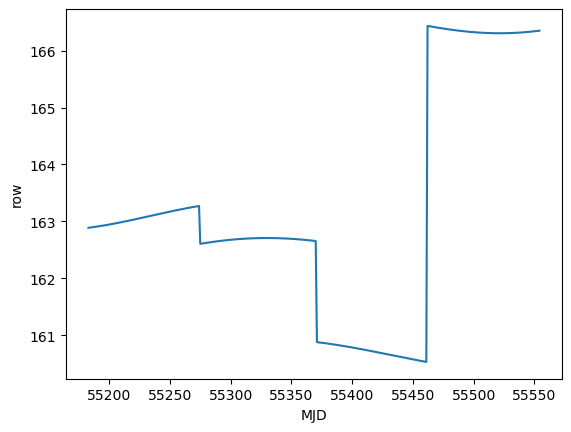

In [8]:
plt.plot(oneYear, r);
plt.xlabel("MJD");
plt.ylabel("row");

Approximately piece them together to see how DVA changes the row within each quarter.

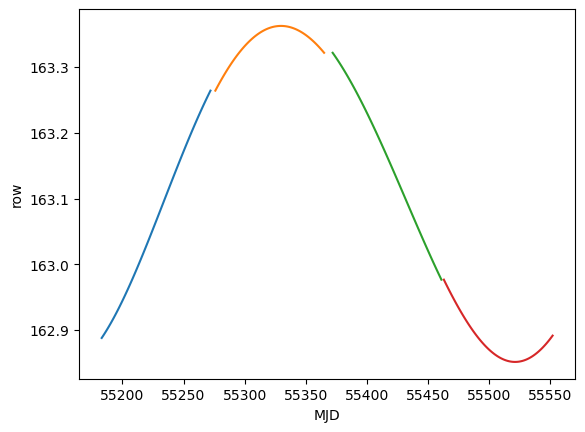

In [9]:
plt.plot(ninetyDays4, r4);
plt.plot(ninetyDays5, r5 - r5[0] + r4[-1]);
lr = r5[-1] - r5[0] + r4[-1];
plt.plot(ninetyDays6, r6 - r6[0] + lr);
lr = r6[-1] - r6[0] + lr;
plt.plot(ninetyDays7, r7 - r7[0] + lr);
plt.xlabel("MJD");
plt.ylabel("row");

Plot in 2D to see how a star moves on the focal plane due to DVA. DVA is large when near the edge of the focal plane.

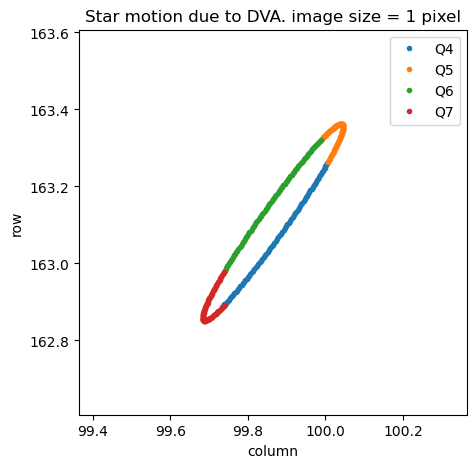

In [10]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.plot(c4, r4, '.');
plt.plot(c5 - c5[0] + c4[-1], r5 - r5[0] + r4[-1], '.');
lr = r5[-1] - r5[0] + r4[-1];
lc = c5[-1] - c5[0] + c4[-1];
plt.plot(c6 - c6[0] + lc, r6 - r6[0] + lr, '.');
lr = r6[-1] - r6[0] + lr;
lc = c6[-1] - c6[0] + lc;
plt.plot(c7 - c7[0] + lc, r7 - r7[0] + lr, '.');
# ax.axis('equal')
xl = plt.xlim();
midx = np.mean(xl);
plt.xlim(midx-0.5, midx+0.5)
yl = plt.ylim();
midy = np.mean(yl);
plt.ylim(midy-0.5, midy+0.5)
plt.xlabel("column");
plt.ylabel("row");
plt.title("Star motion due to DVA. image size = 1 pixel");
plt.legend(["Q4", "Q5", "Q6", "Q7"]);